In [69]:
import numpy as np
import re

In [70]:
# No. of layers = 2
# Types = (Conv+MaxPool)*2 > ReLU

In [71]:
f = open("2.dat","r")
myList = []
for line in f:
    myList.append(line)

In [72]:
def get_data( output ):
    trloss_patt = 'Train net output #0: loss = (\d.\d*)'
    tsloss_patt = 'Test net output #1: loss = (\d.\d*)'
    tsacc_patt = 'Test net output #0: accuracy = (\d.\d*)\n'
    iteration_patt = 'Iteration (\d*) \('
    trloss = re.search(trloss_patt, output)
    tsacc = re.search(tsacc_patt, output)
    tsloss = re.search(tsloss_patt, output)
    iteration = re.search(iteration_patt,output)
    results = (iteration, trloss, tsacc, tsloss)
    names = ['iteration', 'trloss', 'tsacc', 'tsloss']
    if results!=None:
        index = np.where(np.array(results)!=None)[0][0]
        result = results[index]
        result = result.group(1)
#         print '\nparsed', output, '\nwith', names[index], result
        return index, result
#     loss = m.group( 1 )
#     return iteration, accuracy, loss

In [73]:
trloss = [[],[]]
tsacc = [[],[]]
tsloss = [[],[]]
summary = [trloss,tsacc,tsloss]
old_iteration=0
for line in myList:
    try:
        i,r = get_data(line)
        if i==0:
            new_iteration = r
            old_iteration = new_iteration
        else:
            summary[i-1][0].append(old_iteration)
            summary[i-1][1].append(r)
    except:
        pass
#         print '\ncannot parse {}'.format(line)

<IPython.core.display.Javascript object>


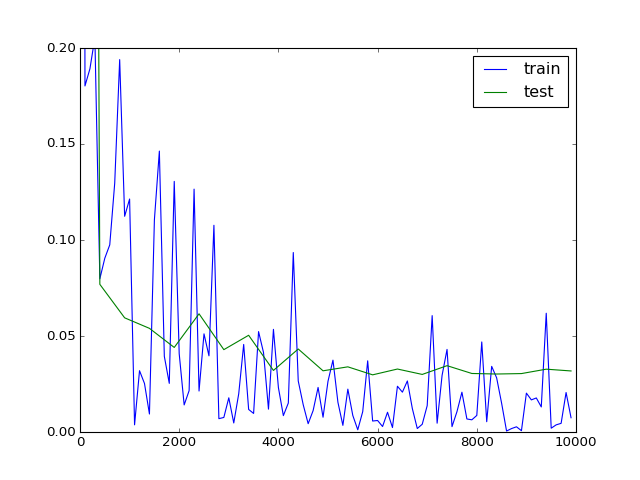

<IPython.core.display.Javascript object>


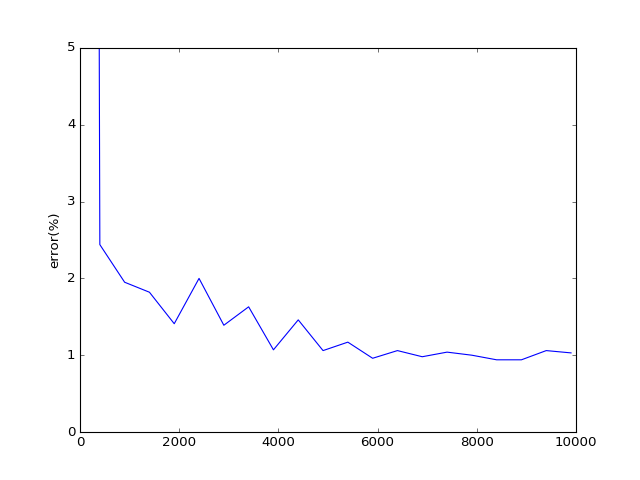

In [74]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(trloss[0],trloss[1],label='train')
plt.plot(tsloss[0],tsloss[1],label='test')
plt.legend()
plt.ylim(0,.2)
# plt.semilogx()
plt.figure()
plt.plot(tsacc[0],(1-np.array(tsacc[1]).astype('float'))*100)
plt.ylabel('error(%)')
plt.ylim(0,5)
plt.show()

In [75]:
print myList[-4:-1]

['I1112 00:19:47.959108 28923 solver.cpp:398]     Test net output #0: accuracy = 0.9897\n', 'I1112 00:19:47.959156 28923 solver.cpp:398]     Test net output #1: loss = 0.0317941 (* 1 = 0.0317941 loss)\n', 'I1112 00:19:47.959179 28923 solver.cpp:316] Optimization Done.\n']
